In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.pyp
import plotly.graph_objs as go
from plotly.offline import iplot #download_plotlyjs, init_notebook_mode, plot, 
import plotly

In [2]:
df = pd.read_csv('test_data.csv', parse_dates=['date'])

In [3]:
df.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


Преобразование времени

In [4]:
df.time = df.time.astype('int').apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [5]:
df.time = pd.to_datetime(df.time)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122097 entries, 0 to 122096
Data columns (total 10 columns):
time                 122097 non-null datetime64[ns]
event                122097 non-null object
ad_cost_type         122097 non-null object
has_video            122097 non-null int64
agency_union_id      122097 non-null object
client_union_id      122097 non-null object
campaign_union_id    122097 non-null object
ad_id                122097 non-null object
platform             122097 non-null object
date                 122097 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 9.3+ MB


Статистический обзор распределения категориальных признаков

In [7]:
df.event.value_counts()

view      87975
click     28639
report     5483
Name: event, dtype: int64

In [8]:
df.ad_cost_type.value_counts()

CPC    74202
CPM    47895
Name: ad_cost_type, dtype: int64

In [9]:
df.agency_union_id.value_counts().head()

agency_2      50796
no_agency     47267
agency_33      1813
agency_158     1712
agency_543     1218
Name: agency_union_id, dtype: int64

In [10]:
df.client_union_id.value_counts().head()

client_47270     47739
client_47269      2285
client_99583      1732
client_42         1493
client_102753      874
Name: client_union_id, dtype: int64

In [11]:
df.platform.value_counts()

android    83312
iphone     16628
web        14108
mvk         7717
wphone       332
Name: platform, dtype: int64

In [12]:
df.ad_id.value_counts().head()

ad_49554    27500
ad_49556     8218
ad_49560     7496
ad_49564     4491
ad_47269     1867
Name: ad_id, dtype: int64

In [13]:
df.campaign_union_id.value_counts().head()

campaign_49554    47739
campaign_47269     1867
campaign_5822      1012
campaign_387        794
campaign_1181       698
Name: campaign_union_id, dtype: int64

In [14]:
df.has_video.value_counts()

0    121429
1       668
Name: has_video, dtype: int64

Расмотрение признаков по времени

In [17]:
df['time'].apply(lambda ts: ts.year).astype('int').unique()

array([2019])

In [18]:
df['time'].apply(lambda ts: ts.month).astype('int').unique()

array([4])

In [19]:
df['date'].apply(lambda ts: ts.month).astype('int').unique()

array([4])

In [20]:
df['time'].apply(lambda ts: ts.day).astype('int').unique()

array([ 8, 12, 16,  9, 11, 13,  5, 10,  2, 14,  7,  4,  3,  1, 15,  6])

In [21]:
df['date'].apply(lambda ts: ts.day).astype('int').unique()

array([ 8, 12, 16,  9, 11, 13,  5, 10,  2, 14,  7,  4,  3,  1, 15,  6])

In [22]:
df[['date','time']].head()

,date,time
0,2019-04-08,2019-04-08 17:22:25
1,2019-04-12,2019-04-12 21:10:58
2,2019-04-16,2019-04-16 08:16:41
3,2019-04-09,2019-04-09 15:07:59
4,2019-04-11,2019-04-11 07:11:57


Колонка 'time' дублирует колонку 'date' с добавлением времени

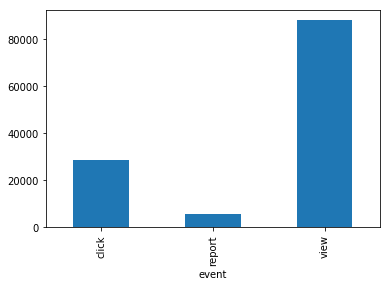

In [186]:
# Распределение событий
df.groupby('event').size().plot(kind='bar');

In [187]:
df[(df.event == 'view')]['date'].value_counts().values

array([16097,  9299,  8585,  7046,  6832,  5828,  5390,  4936,  4842,
        3216,  3005,  2983,  2869,  2685,  2284,  2078])

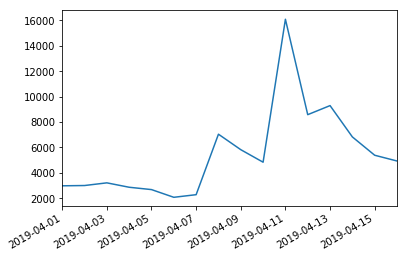

In [25]:
df[(df.event == 'view')]['date'].value_counts().plot()

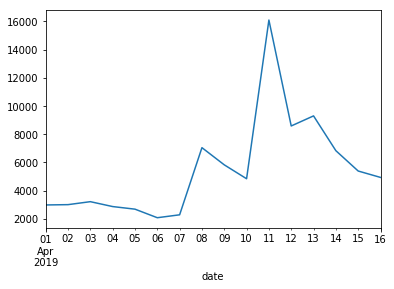

In [188]:
# второй способ построения графика
df[(df.event == 'view')].groupby('date').size().plot()

In [189]:
# график с помощью plotly
years_df = df[(df.event == 'view')].groupby('date').size()

trace = plotly.graph_objs.Scatter(
    x=years_df.index,
    y=years_df.values
)
data=go.Data([trace])
layout=go.Layout(title="Распределение просмотров по дням", xaxis={'title':'Дни'}, yaxis={'title':'Кол-во просмотров'})
figure=go.Figure(data=data,layout=layout)
iplot(figure, show_link=False)

/home/helga/anaconda3/envs/curr_env/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [49]:
plotly.offline.plot(figure, filename='day_views_stats.html', show_link=True)

'day_views_stats.html'

График соответсвует данному в условию и отобраажет отношения кол-ва просмотров по времени

## Анализ аномалии

In [54]:
df[(df.event) == 'view'].head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
5,2019-04-16 12:48:33,view,CPC,0,no_agency,client_265,campaign_13516,ad_13517,android,2019-04-16
7,2019-04-05 22:24:03,view,CPM,0,agency_155,client_105617,campaign_106015,ad_106015,iphone,2019-04-05
8,2019-04-10 23:57:14,view,CPM,0,no_agency,client_264,campaign_13491,ad_13513,android,2019-04-10
9,2019-04-08 10:31:06,view,CPM,0,no_agency,client_1728,campaign_19254,ad_19255,android,2019-04-08
10,2019-04-08 15:44:55,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49564,web,2019-04-08


In [56]:
df[(df.event) == 'view'].groupby('date')['ad_cost_type'].value_counts()

date        ad_cost_type
2019-04-01  CPC              1732
            CPM              1251
2019-04-02  CPC              1651
            CPM              1354
2019-04-03  CPC              1880
            CPM              1336
2019-04-04  CPC              1845
            CPM              1024
2019-04-05  CPC              1840
            CPM               845
2019-04-06  CPC              1375
            CPM               703
2019-04-07  CPC              1467
            CPM               817
2019-04-08  CPC              6001
            CPM              1045
2019-04-09  CPC              4872
            CPM               956
2019-04-10  CPC              3895
            CPM               947
2019-04-11  CPC             15270
            CPM               827
2019-04-12  CPC              7683
            CPM               902
2019-04-13  CPC              8509
            CPM               790
2019-04-14  CPC              5932
            CPM               900
2019-04-15  CPC        

в день аномального увеличения числа просмотров CPC (траты за клик) в разы больше

In [58]:
df.shape

(122097, 10)

In [59]:
df_test = df

In [67]:
df_test = df_test.drop_duplicates(subset=df_test.columns)

In [61]:
df_test.shape

(120961, 10)

Имеются дубликаты в количестве ~ 1к

In [82]:
excess_list = []
for i in range(df.shape[0]):
    if i not in df_test.index:
        excess_list.append(i)

In [86]:
df.iloc[excess_list]['event'].value_counts()

view      1110
click       25
report       1
Name: event, dtype: int64

In [90]:
df.iloc[excess_list].head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
2234,2019-04-11 10:11:47,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
3241,2019-04-10 19:09:35,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,iphone,2019-04-10
4416,2019-04-10 19:10:55,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-10
5290,2019-04-11 13:11:37,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
6492,2019-04-13 12:22:08,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-13


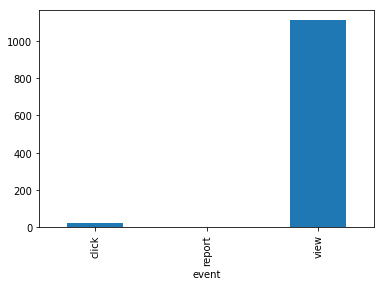

In [231]:
# второй способ построения графика
df.iloc[excess_list].groupby('event').size().plot(kind='bar')

Большинство дубликатов относятся к типу события "view". Но их не достаточно много, чтобы можно было сделать вывод, что аномалии произошли из-за дубликатов.

In [93]:
df[(df.event == 'view')].groupby('date')['platform'].value_counts()

date        platform
2019-04-01  android      2032
            iphone        492
            web           293
            mvk           166
2019-04-02  android      2024
            iphone        556
            web           265
            mvk           160
2019-04-03  android      2131
            iphone        605
            web           331
            mvk           149
2019-04-04  android      1907
            iphone        522
            web           295
            mvk           145
2019-04-05  android      1805
            iphone        487
            web           230
            mvk           163
2019-04-06  android      1424
            iphone        385
            web           144
            mvk           125
2019-04-07  android      1551
            iphone        429
            web           171
            mvk           133
2019-04-08  android      4377
            iphone       1403
                        ...  
2019-04-09  web           554
            mvk    

В день аномальной активности больше всего использования android, как и в остальные дни

In [233]:
df[(df.event == 'view')&(df.date=='2019-04-11')]['agency_union_id'].value_counts().head(10)

agency_2      14025
no_agency      1119
agency_29        88
agency_33        81
agency_77        50
agency_148       40
agency_11        37
agency_606       33
agency_51        30
agency_70        29
Name: agency_union_id, dtype: int64

Больше просмотров agency_union_id - "agency_2"

In [99]:
df[(df.agency_union_id)=='agency_2']['event'].value_counts()

view      50736
click        54
report        6
Name: event, dtype: int64

agency_2 среди всех событий выделяется 'view'

In [100]:
df[(df.agency_union_id)=='no_agency']['event'].value_counts()

click     22217
view      20799
report     4251
Name: event, dtype: int64

In [101]:
df[(df.agency_union_id)=='agency_29']['event'].value_counts()

view     339
click      4
Name: event, dtype: int64

Распределения событий других агенств разнородны

In [105]:
df[(df.agency_union_id=='agency_2')&(df.event=='view')]['has_video'].value_counts()

0    50736
Name: has_video, dtype: int64

Видео не имеется

In [119]:
df['has_video'].value_counts()

0    121429
1       668
Name: has_video, dtype: int64

в выборке больше экземпляров без видео

In [108]:
df[(df.agency_union_id=='agency_2')&(df.event=='view')&(df.date=='2019-04-11')]['client_union_id'].value_counts()

client_47270    13931
client_47269       92
client_47296        2
Name: client_union_id, dtype: int64

agency_2 прослеживается связь с client_union_id - "client_47270"

In [121]:
df[(df.agency_union_id=='agency_2')&(df.event=='view')].groupby('date')['client_union_id'].value_counts()

date        client_union_id
2019-04-01  client_47296          87
2019-04-02  client_47296         115
2019-04-03  client_47269         196
            client_47296          44
2019-04-04  client_47269         193
            client_47296          32
2019-04-05  client_47270         211
            client_47269         169
            client_47296          11
2019-04-06  client_47269         133
            client_47296          20
2019-04-07  client_47269         162
            client_47296          25
2019-04-08  client_47270        4376
            client_47269         180
            client_47296         100
2019-04-09  client_47270        2875
            client_47269         161
            client_47296          80
2019-04-10  client_47270        1988
            client_47269         163
            client_47296          38
2019-04-11  client_47270       13931
            client_47269          92
            client_47296           2
2019-04-12  client_47270        6687
          

In [118]:
df[(df.client_union_id == 'client_47270')]['date'].value_counts()

2019-04-11    13941
2019-04-13     7593
2019-04-12     6698
2019-04-14     4913
2019-04-08     4378
2019-04-15     3278
2019-04-09     2879
2019-04-10     1991
2019-04-16     1857
2019-04-05      211
Name: date, dtype: int64

client_47270 имеет самую большую долю просмотров agency_2 по всем дням

In [107]:
df[(df.agency_union_id=='agency_2')&(df.event=='view')]['campaign_union_id'].value_counts()

campaign_49554    47688
campaign_47269     1866
campaign_47279      418
campaign_97294      357
campaign_97299      141
campaign_97293      134
campaign_97307       63
campaign_97306       50
campaign_97296       19
Name: campaign_union_id, dtype: int64

In [131]:
df[(df.date=='2019-04-11')&(df.event=='view')].head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
16,2019-04-11 20:02:17,view,CPC,0,agency_2,client_47269,campaign_47269,ad_47269,android,2019-04-11
19,2019-04-11 19:30:01,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
22,2019-04-11 10:08:03,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11
25,2019-04-11 06:31:51,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49560,android,2019-04-11
43,2019-04-11 11:15:49,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11


In [123]:
df[(df.date=='2019-04-11')&(df.event=='view')]['time'].apply(lambda x: x.hour).value_counts()

11    1876
10    1733
12    1690
13    1520
14    1426
15    1195
18     749
16     749
20     732
19     722
21     719
17     699
22     611
9      466
23     440
8      229
7      166
6      125
0       73
5       64
4       43
3       26
1       26
2       18
Name: time, dtype: int64

По времени не имеется аномальных тенденций

In [125]:
df[(df.agency_union_id=='agency_2')&(df.event=='view')]['ad_id'].value_counts()

ad_49554    27464
ad_49556     8215
ad_49560     7489
ad_49564     4486
ad_47269     1866
ad_49136      418
ad_97427      357
ad_97803      141
ad_97293      134
ad_97994       63
ad_97944       50
ad_50872       34
ad_97784       19
Name: ad_id, dtype: int64

In [128]:
df[(df.ad_id=='ad_49554')]['event'].value_counts()

view      27464
click        31
report        5
Name: event, dtype: int64

In [130]:
df[(df.ad_id=='ad_49554')].groupby('date')['event'].value_counts()

date        event 
2019-04-10  view       272
2019-04-11  view      9631
            click        6
            report       3
2019-04-12  view      4859
            click        8
            report       1
2019-04-13  view      6270
            click        4
            report       1
2019-04-14  view      3688
            click        5
2019-04-15  view      2356
            click        8
2019-04-16  view       388
Name: event, dtype: int64

In [138]:
df[(df.date == '2019-04-11')]['campaign_union_id'].value_counts().head()

campaign_49554    13941
campaign_387        143
campaign_47269       79
campaign_99242       73
campaign_5822        62
Name: campaign_union_id, dtype: int64

Большая активность набора рекламных объявлений "campaign_49554"

In [221]:
df[(df.date == '2019-04-11')&(
    df.campaign_union_id == 'campaign_49554')][['agency_union_id','client_union_id']].head(10)

,agency_union_id,client_union_id
19,agency_2,client_47270
22,agency_2,client_47270
25,agency_2,client_47270
43,agency_2,client_47270
44,agency_2,client_47270
47,agency_2,client_47270
48,agency_2,client_47270
53,agency_2,client_47270
60,agency_2,client_47270
69,agency_2,client_47270


In [168]:
df[(df.date == '2019-04-11')&(
    df.campaign_union_id == 'campaign_49554')][['agency_union_id','client_union_id']].shape

(13941, 2)

In [170]:
df[(df.date == '2019-04-11')&(
    df.campaign_union_id == 'campaign_49554')].groupby('agency_union_id')['client_union_id'].value_counts()

agency_union_id  client_union_id
agency_2         client_47270       13941
Name: client_union_id, dtype: int64

У рекламного агенства 'agency_2' только один клиент 'client_47270' в этот день(аномальной активности)

In [175]:
df[(df.campaign_union_id == 'campaign_49554')].groupby(
    ['agency_union_id','date','event'])['client_union_id'].value_counts()

agency_union_id  date        event   client_union_id
agency_2         2019-04-05  view    client_47270         211
                 2019-04-08  click   client_47270           2
                             view    client_47270        4376
                 2019-04-09  click   client_47270           4
                             view    client_47270        2875
                 2019-04-10  click   client_47270           2
                             report  client_47270           1
                             view    client_47270        1988
                 2019-04-11  click   client_47270           7
                             report  client_47270           3
                             view    client_47270       13931
                 2019-04-12  click   client_47270          10
                             report  client_47270           1
                             view    client_47270        6687
                 2019-04-13  click   client_47270           5
                 

Тот же клиент в другие дни

In [227]:
df[(df.client_union_id) == 'client_47270'].groupby(['agency_union_id','date'])['event'].value_counts()

agency_union_id  date        event 
agency_2         2019-04-05  view        211
                 2019-04-08  view       4376
                             click         2
                 2019-04-09  view       2875
                             click         4
                 2019-04-10  view       1988
                             click         2
                             report        1
                 2019-04-11  view      13931
                             click         7
                             report        3
                 2019-04-12  view       6687
                             click        10
                             report        1
                 2019-04-13  view       7587
                             click         5
                             report        1
                 2019-04-14  view       4908
                             click         5
                 2019-04-15  view       3270
                             click         8
                 20

Активность данного клиента (client_47270) только у данного агенства (arancy_2).

**Вывод:** требуется отслеживать активную деятельность клиента. Если они соответсвуют Только конкретному клиенту (кроме 'no_agency', который не соотвествует конкретному лицу) - принемать меры

In [235]:
df.groupby(['client_union_id'])['agency_union_id'].value_counts().sort_values(ascending=False).head()

client_union_id  agency_union_id
client_47270     agency_2           47739
client_47269     agency_2            2285
client_99583     agency_33           1732
client_42        no_agency           1493
client_102753    agency_70            874
Name: agency_union_id, dtype: int64

In [247]:
df.groupby('client_union_id')['agency_union_id'].value_counts()

client_union_id  agency_union_id
client_1         no_agency           294
client_10        no_agency            40
client_100       no_agency            41
client_1000      no_agency            10
client_10021     no_agency             1
client_10031     no_agency             4
client_10039     no_agency             2
client_1004      no_agency            31
client_1005      no_agency            12
client_10085     no_agency            17
client_10096     no_agency            37
client_101       no_agency             4
client_10127     no_agency             1
client_10134     no_agency             1
client_101388    agency_33             2
client_101391    agency_33             2
client_101392    agency_33             1
client_101394    agency_33             1
client_101395    agency_34           427
client_101468    agency_34             2
client_101506    agency_34             3
client_10157     no_agency             6
client_10166     no_agency             3
client_101827    agency_